<a href="https://colab.research.google.com/github/7rdudd/dhvmsthtm/blob/main/230411_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

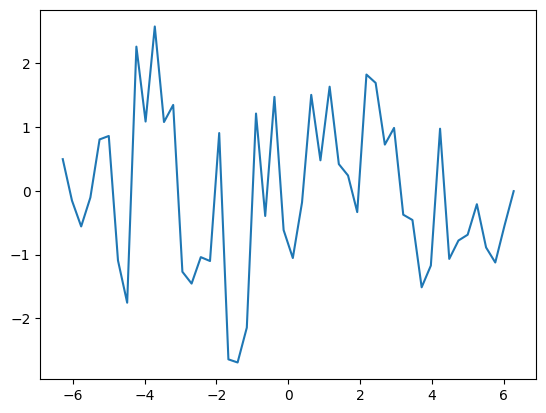

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data=np.linspace(-2*np.pi,2*np.pi)
sin_data=np.sin(x_data)+0.1*np.random.randn(len(x_data))

plt.plot(x_data,sin_data)
plt.show()
n_rnn=10
n_sample=len(x_data)-n_rnn
x=np.zeros((n_sample,n_rnn))
t=np.zeros((n_sample,n_rnn))
for i in range(0,n_sample):
  x[i]=sin_data[i:i+n_rnn]

In [ ]:
t[i]= sin_data[i+1:i+n_rnn+1] # 시계열을 입력보다도 1개 뒤로 비켜놓는다
x = x.reshape(n_sample, n_rnn, 1) # keras에서의 RNN에서는 입력을 (샘플 수, 시계열의 수, 입력층의 뉴런 수)로 한다
print(x.shape)
t= t.reshape(n_sample, n_rnn, 1) # 이번은 입럭과 같은 형태
print(t.shape)

(40, 10, 1)
(40, 10, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow. keras. layers import Dense, SimpleRNN

n_in=1 #입력층증의 뉴런 수
n_mid=20 # 중간층의 뉴런 수
n_out =1 #출력력층의 뉴런 수

model= Sequential()
model.add (SimpleRNN(n_mid, input_shape=(n_rnn, n_in),return_sequences=True)) #유 간단한 RN층
model.add(Dense(n_out, activation="linear")) 
model.compile(loss="mean_squared_error", optimizer="sgd")

print (model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 10, 20)            440       
                                                                 
 dense_5 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x, t, epochs=20, batch_size=8,validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 2s 122ms/step - loss: 0.2695 - val_loss: 0.3194
Epoch 2/20
5/5 [==============================] - 0s 19ms/step - loss: 0.1431 - val_loss: 0.2845
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0886 - val_loss: 0.2649
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0621 - val_loss: 0.2508
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0476 - val_loss: 0.2411
Epoch 6/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0388 - val_loss: 0.2320
Epoch 7/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0328 - val_loss: 0.2246
Epoch 8/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0284 - val_loss: 0.2189
Epoch 9/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0251 - val_loss: 0.2142
Epoch 10/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0224 - val_loss: 0.2104
Epoch 11/20
5/5 [===========

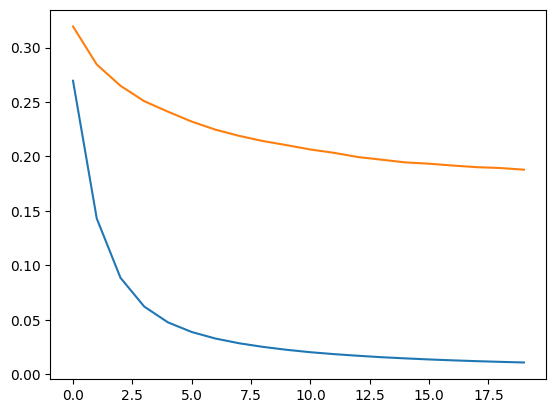

In [ ]:
loss = history.history['loss']
vloss = history.history['val_loss']
plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

1/1 [==============================] - 0s 24ms/step


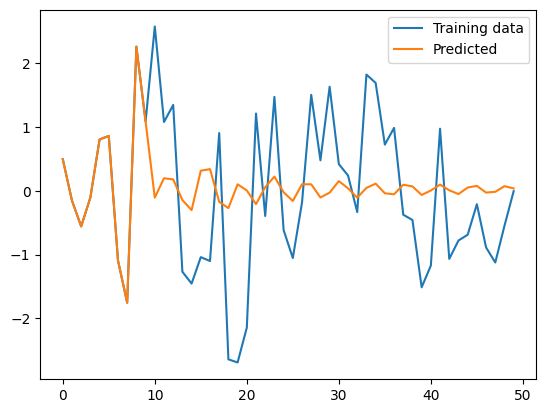

In [ ]:
predicted = x[0].reshape(-1)
for i in range(0, n_sample):
  y= model. predict(predicted[-n_rnn:].reshape(1,n_rnn, 1))# 최근 데이터를 사용해서 예측윤 실시한다
  predicted= np.append(predicted, y[0][n_rnn-1][0])
plt.plot(np.arange(len(sin_data)), sin_data, label="Training data") # 훈린에 사용한 데이터
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")

plt.legend()
plt.show()